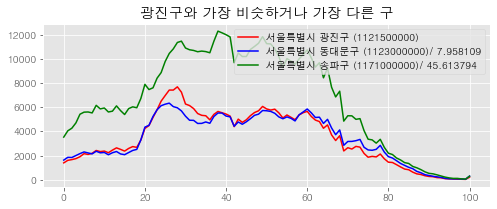

In [30]:
#14주차 실습 과제 
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
#-*-Encoding:UTF-8 -*-#

font_path = 'C:/Windows/Fonts/H2GTRM.TTF'   ## 한글 범례를 위해서 넣었습니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font',family=font_name)

f1 = open('202012_202012_연령별인구현황_월간.csv')
data = csv.reader(f1)
next(data)

f2 = open('202012_202012_연령별인구현황_월간.csv')
data2 = csv.reader(f2)
next(data2)
next(data2)  ## 다른 것과 비교해야되는데 데이터 첫번째 행은 서울 특별시 전체임으로 뺴야됨

We = [] ## 광진구 데이터 저장

Max = [] ## 가장 유사한 구
Maxiter = 999999999 ## 가장 유사하면 적어야함
Min = [] ## 가장 다른 구
Miniter = 0 ## 가장 다르면 높아야함
age = np.arange(101)  ##나이

for line in data:
    if line[0] == '서울특별시 광진구 (1121500000)':
        We = line
        
result1 = We[3:]
for i in age:
    result1[i] = int(result1[i].replace(',',''))
result1 = np.array(result1)    ##nbarray 로 변경

for line in data2:
    if line[0] != '서울특별시 광진구 (1121500000)': ##광진구가 아닐때
        temp_list = line[3:]
        for i in age:
            temp_list[i] = int(temp_list[i].replace(',',''))
        temp_arr = np.array(temp_list)
        sum = np.sum(np.power(temp_arr-result1,2))    ## numpy를 이용하여 배열을 빼고, 제곱한 다음, 그 합을 구해줌
        if sum < Maxiter:
            Max = line
            Maxiter = sum
        if sum > Miniter:
            Min = line
            Miniter = sum
        
result2 = Max[3:]
result3 = Min[3:]

for i in age:
    result2[i] = int(result2[i].replace(',',''))
    result3[i] = int(result3[i].replace(',',''))
result2 = np.array(result2)
result3 = np.array(result3)

devi1 = np.sqrt(Maxiter / int(Max[1].replace(',','')))  ## 표준편차 = 루트(전체합/전체수==전체인구)
devi2 = np.sqrt(Miniter / int(Min[1].replace(',','')))

f1.close()
f2.close()
plt.style.use('ggplot')
plt.figure(figsize=(8, 3))
plt.title("광진구와 가장 비슷하거나 가장 다른 구")
plt.plot(result1,color='red',label = We[0])
str1 = Max[0] + "/ {:f}".format(devi1)
plt.plot(result2,color='blue',label = str1)
str2 = Min[0] + "/ {:f}".format(devi2)
plt.plot(result3,color='green',label = str2)
plt.legend()
plt.show()